In [46]:
import os
from pathlib import Path
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import pickle
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
%matplotlib inline

In [47]:
with open("df.pkl", "rb") as file:
    df_agriculture = pickle.load(file)

In [48]:
df_agriculture.dropna(subset=["Price USD"], inplace=True)
df_agriculture.drop(['Country', 'Country Code', 'Seed','Stock Variation','Export Quantity','Exchange Rate', 'Year', 'Feed', 'Food', 'Import Quantity', 'Production','Losses', 'Other uses (non-food)', 'Processing'], axis=1, inplace=True)

In [49]:
df_agriculture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131 entries, 1226 to 13596
Data columns (total 12 columns):
Producer Price (LCU/tonne)     1131 non-null float64
Price USD                      1131 non-null float64
Area harvested                 1062 non-null float64
Yield                          1062 non-null float64
Domestic Supply                976 non-null float64
Pesticides                     600 non-null float64
Fertilizer                     1131 non-null float64
food_supply_percentage         928 non-null float64
feed_supply_percentage         976 non-null float64
export_supply_percentage       1062 non-null float64
other_use_supply_percentage    839 non-null float64
import_supply_percentage       976 non-null float64
dtypes: float64(12)
memory usage: 114.9 KB


In [50]:
df_agriculture.dropna(subset=["other_use_supply_percentage"], inplace=True)
df_agriculture.dropna(subset=["food_supply_percentage"], inplace=True)
df_agriculture.dropna(subset=["export_supply_percentage"], inplace=True)
df_agriculture.dropna(subset=["import_supply_percentage"], inplace=True)
df_agriculture.dropna(subset=["feed_supply_percentage"], inplace=True)

In [51]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
imputer.fit(df_agriculture)

SimpleImputer(add_indicator=False, copy=True, fill_value=0, missing_values=nan,
              strategy='constant', verbose=0)

In [52]:
X = imputer.transform(df_agriculture)
df_agriculture_cleaned = pd.DataFrame(X,columns=df_agriculture.columns)

In [53]:
df_agriculture_cleaned["Price Level"] = pd.cut(x=df_agriculture_cleaned['Price USD'], bins=[0, 10.5, 55, 274, np.inf], labels=[1,2,3,4])
df_agriculture_cleaned["Price Level"] = pd.to_numeric(df_agriculture_cleaned["Price Level"])

In [54]:
df_agriculture_cleaned["Price Level"].value_counts() / len(df_agriculture_cleaned)

4.0    0.648546
3.0    0.208597
1.0    0.091024
2.0    0.045512
Name: Price Level, dtype: float64

In [55]:
df_agriculture_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 13 columns):
Producer Price (LCU/tonne)     791 non-null float64
Price USD                      791 non-null float64
Area harvested                 791 non-null float64
Yield                          791 non-null float64
Domestic Supply                791 non-null float64
Pesticides                     791 non-null float64
Fertilizer                     791 non-null float64
food_supply_percentage         791 non-null float64
feed_supply_percentage         791 non-null float64
export_supply_percentage       791 non-null float64
other_use_supply_percentage    791 non-null float64
import_supply_percentage       791 non-null float64
Price Level                    786 non-null float64
dtypes: float64(13)
memory usage: 80.5 KB


In [56]:
df_agriculture_cleaned.head()

,Producer Price (LCU/tonne),Price USD,Area harvested,Yield,Domestic Supply,Pesticides,Fertilizer,food_supply_percentage,feed_supply_percentage,export_supply_percentage,other_use_supply_percentage,import_supply_percentage,Price Level
0,76.19,68.026775,79600.0,15694.0,137.0,0.0,1128490.0,29.197080,65.693431,1.600000,1.459854,2.189781,3.0
1,2178.00,4115.317932,55317.0,49644.0,514.0,0.0,216903.0,5.447471,89.688716,0.363636,0.194553,67.315175,4.0
2,108.00,0.126360,574148.0,38431.0,1796.0,0.0,476842.0,7.405345,74.109131,8.473040,0.000000,4.231626,1.0
3,57.87,62.344335,326415.0,51615.0,2267.0,0.0,812258.0,2.161447,70.313189,0.534125,0.970446,26.202029,3.0
4,0.29,0.001117,80700.0,35357.0,315.0,0.0,111596.0,8.888889,86.666667,0.000000,2.222222,9.523810,1.0


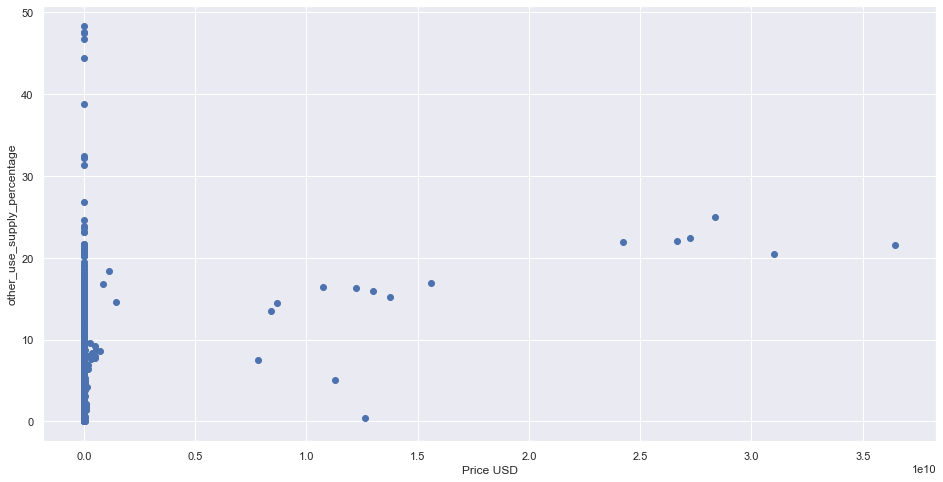

In [57]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_agriculture_cleaned['Price USD'], df_agriculture_cleaned['other_use_supply_percentage'])
ax.set_xlabel('Price USD')
ax.set_ylabel('other_use_supply_percentage')
plt.show()

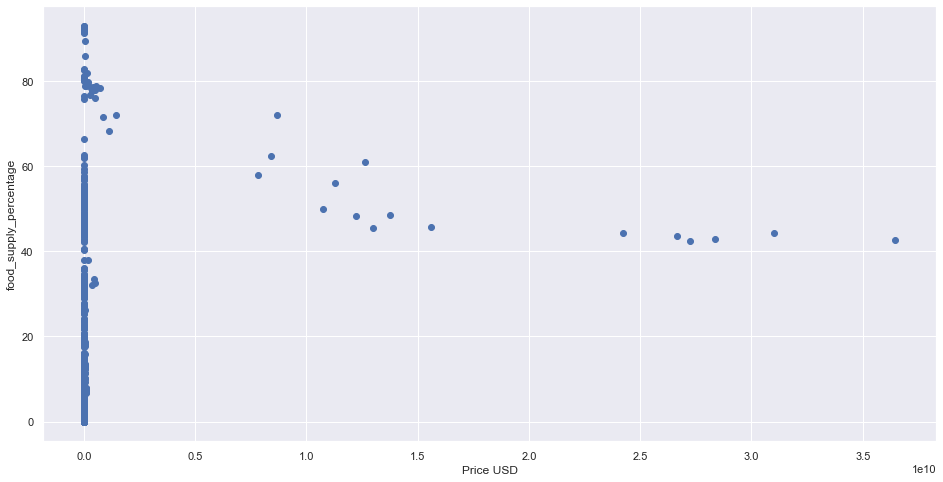

In [58]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_agriculture_cleaned['Price USD'], df_agriculture_cleaned['food_supply_percentage'])
ax.set_xlabel('Price USD')
ax.set_ylabel('food_supply_percentage')
plt.show()

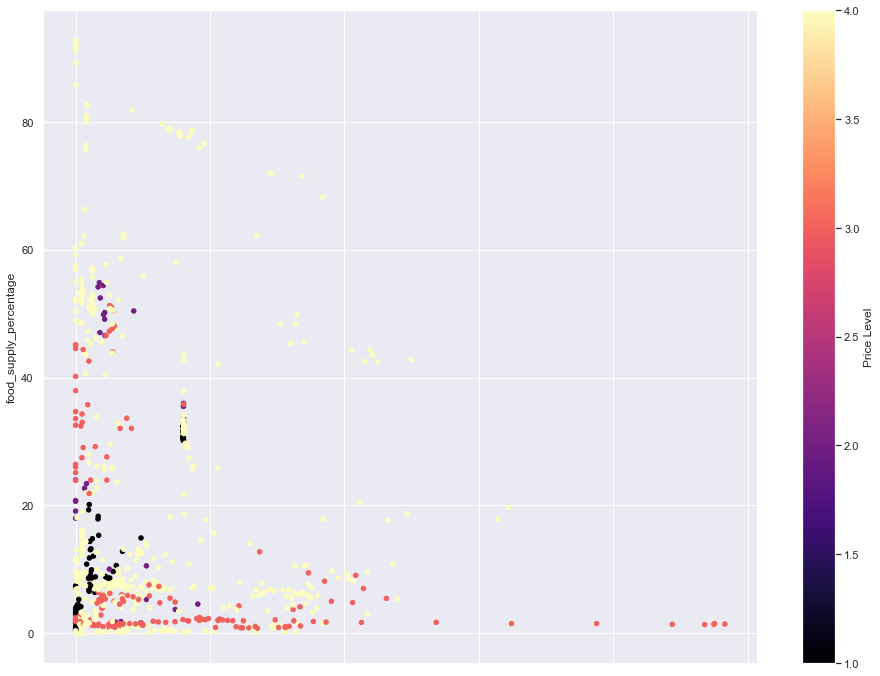

In [59]:
df_agriculture_cleaned.plot(kind='scatter', x='other_use_supply_percentage', y='food_supply_percentage', c='Price Level', colormap="magma", figsize=(16,12) )

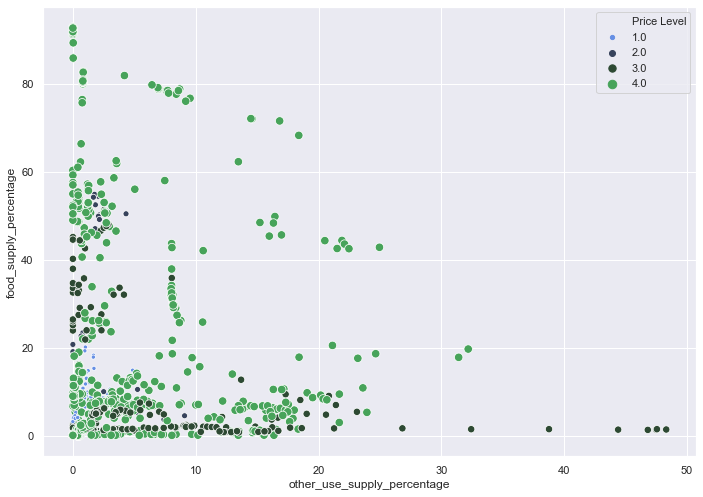

In [60]:
cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark", as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(x="other_use_supply_percentage", y="food_supply_percentage", size="Price Level",
                     hue="Price Level",
                     palette=cmap, data=df_agriculture_cleaned)

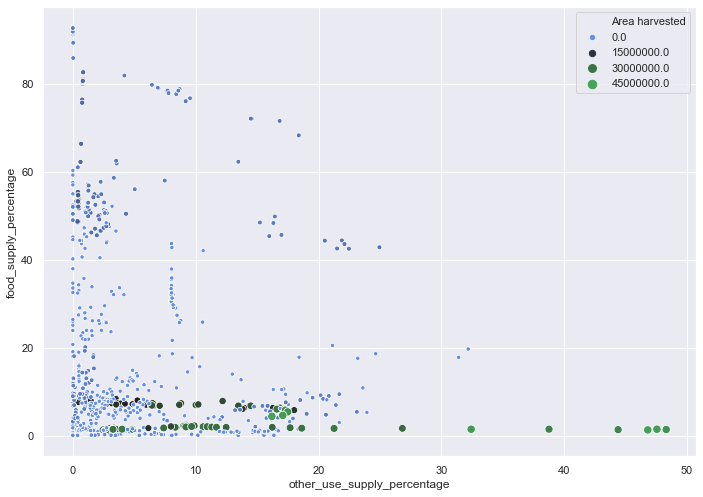

In [61]:
cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark", as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(x="other_use_supply_percentage", y="food_supply_percentage", size="Area harvested",
                     hue="Area harvested",
                     palette=cmap, data=df_agriculture_cleaned)

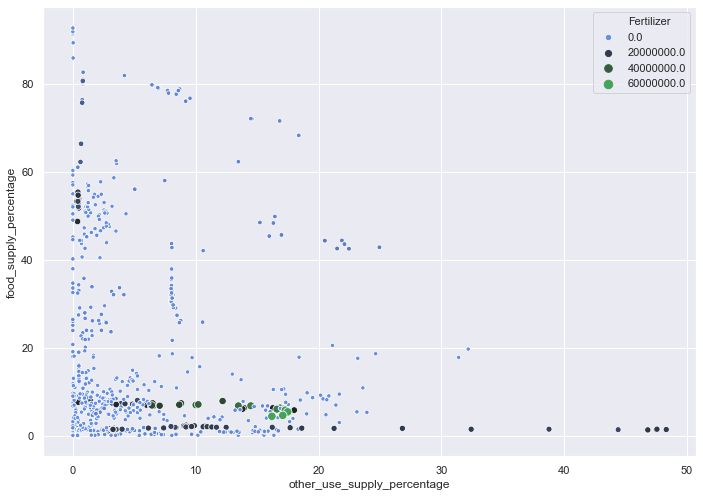

In [62]:
cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark", as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(x="other_use_supply_percentage", y="food_supply_percentage", size="Fertilizer",
                     hue="Fertilizer",
                     palette=cmap, data=df_agriculture_cleaned)

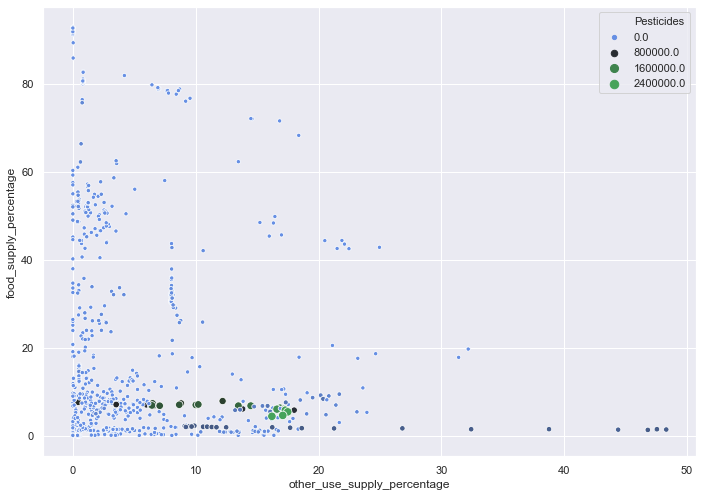

In [63]:
cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark", as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(x="other_use_supply_percentage", y="food_supply_percentage", size="Pesticides",
                     hue="Pesticides",
                     palette=cmap, data=df_agriculture_cleaned)

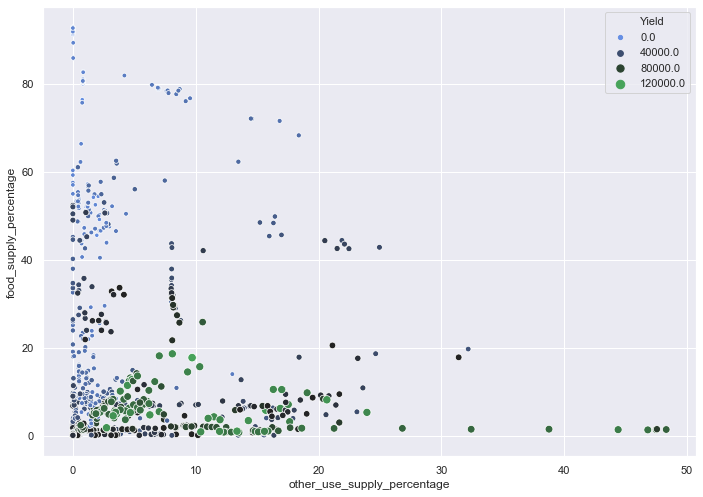

In [64]:
cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark", as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(x="other_use_supply_percentage", y="food_supply_percentage", size="Yield",
                     hue="Yield",
                     palette=cmap, data=df_agriculture_cleaned)

In [65]:
corr_matrix = df_agriculture_cleaned.corr()

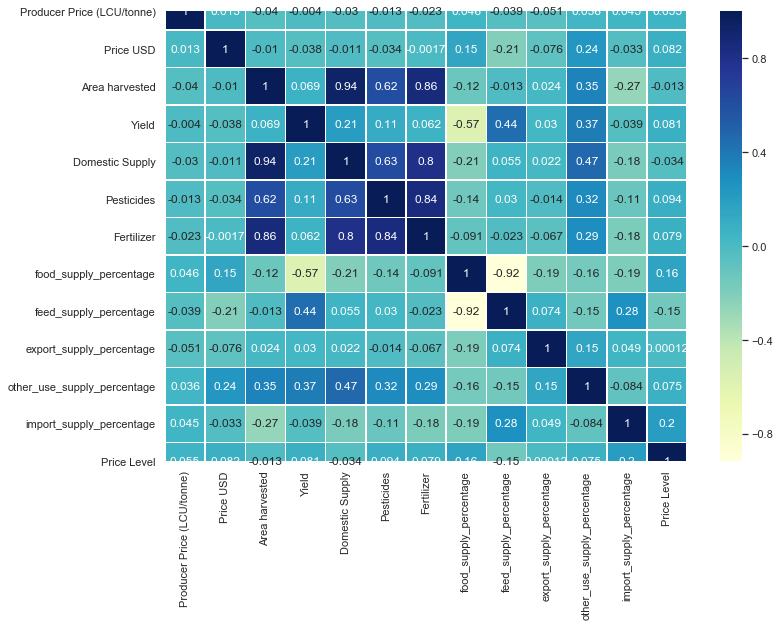

In [74]:
ax = sns.heatmap(corr_matrix, linewidths=.5, annot=True, cmap="YlGnBu")

In [203]:
corr_matrix['food_supply_percentage'].sort_values(ascending=False)

food_supply_percentage         1.000000
Price Level                    0.157386
Price USD                      0.152746
Producer Price (LCU/tonne)     0.045850
Fertilizer                    -0.090605
Area harvested                -0.115741
Pesticides                    -0.135172
other_use_supply_percentage   -0.158367
import_supply_percentage      -0.194038
export_supply_percentage      -0.194109
Domestic Supply               -0.209100
Yield                         -0.567638
feed_supply_percentage        -0.916291
Name: food_supply_percentage, dtype: float64

In [204]:
corr_matrix['other_use_supply_percentage'].sort_values(ascending=False)

other_use_supply_percentage    1.000000
Domestic Supply                0.473425
Yield                          0.373510
Area harvested                 0.348011
Pesticides                     0.317041
Fertilizer                     0.294942
Price USD                      0.243772
export_supply_percentage       0.152328
Price Level                    0.074859
Producer Price (LCU/tonne)     0.036049
import_supply_percentage      -0.084344
feed_supply_percentage        -0.150412
food_supply_percentage        -0.158367
Name: other_use_supply_percentage, dtype: float64

In [205]:
corr_matrix['export_supply_percentage'].sort_values(ascending=False)

export_supply_percentage       1.000000
other_use_supply_percentage    0.152328
feed_supply_percentage         0.073681
import_supply_percentage       0.049263
Yield                          0.030399
Area harvested                 0.023651
Domestic Supply                0.022103
Price Level                    0.000123
Pesticides                    -0.014132
Producer Price (LCU/tonne)    -0.050784
Fertilizer                    -0.066859
Price USD                     -0.075637
food_supply_percentage        -0.194109
Name: export_supply_percentage, dtype: float64

In [206]:
corr_matrix['import_supply_percentage'].sort_values(ascending=False)

import_supply_percentage       1.000000
feed_supply_percentage         0.280651
Price Level                    0.202651
export_supply_percentage       0.049263
Producer Price (LCU/tonne)     0.045285
Price USD                     -0.032847
Yield                         -0.039409
other_use_supply_percentage   -0.084344
Pesticides                    -0.109344
Domestic Supply               -0.176287
Fertilizer                    -0.184323
food_supply_percentage        -0.194038
Area harvested                -0.270409
Name: import_supply_percentage, dtype: float64

In [207]:
corr_matrix['feed_supply_percentage'].sort_values(ascending=False)

feed_supply_percentage         1.000000
Yield                          0.438859
import_supply_percentage       0.280651
export_supply_percentage       0.073681
Domestic Supply                0.054624
Pesticides                     0.029704
Area harvested                -0.013438
Fertilizer                    -0.022715
Producer Price (LCU/tonne)    -0.038709
Price Level                   -0.146673
other_use_supply_percentage   -0.150412
Price USD                     -0.207063
food_supply_percentage        -0.916291
Name: feed_supply_percentage, dtype: float64

In [208]:
corr_matrix['Price Level'].sort_values(ascending=False)

Price Level                    1.000000
import_supply_percentage       0.202651
food_supply_percentage         0.157386
Pesticides                     0.094179
Price USD                      0.082264
Yield                          0.081167
Fertilizer                     0.079476
other_use_supply_percentage    0.074859
Producer Price (LCU/tonne)     0.054777
export_supply_percentage       0.000123
Area harvested                -0.012630
Domestic Supply               -0.034066
feed_supply_percentage        -0.146673
Name: Price Level, dtype: float64

In [209]:
corr_matrix['Price USD'].sort_values(ascending=False)

Price USD                      1.000000
other_use_supply_percentage    0.243772
food_supply_percentage         0.152746
Price Level                    0.082264
Producer Price (LCU/tonne)     0.012936
Fertilizer                    -0.001656
Area harvested                -0.010489
Domestic Supply               -0.011383
import_supply_percentage      -0.032847
Pesticides                    -0.034047
Yield                         -0.038366
export_supply_percentage      -0.075637
feed_supply_percentage        -0.207063
Name: Price USD, dtype: float64

In [210]:
corr_matrix['Area harvested'].sort_values(ascending=False)

Area harvested                 1.000000
Domestic Supply                0.939048
Fertilizer                     0.860021
Pesticides                     0.618115
other_use_supply_percentage    0.348011
Yield                          0.068842
export_supply_percentage       0.023651
Price USD                     -0.010489
Price Level                   -0.012630
feed_supply_percentage        -0.013438
Producer Price (LCU/tonne)    -0.040185
food_supply_percentage        -0.115741
import_supply_percentage      -0.270409
Name: Area harvested, dtype: float64

In [211]:
corr_matrix['Fertilizer'].sort_values(ascending=False)

Fertilizer                     1.000000
Area harvested                 0.860021
Pesticides                     0.843292
Domestic Supply                0.803875
other_use_supply_percentage    0.294942
Price Level                    0.079476
Yield                          0.061645
Price USD                     -0.001656
feed_supply_percentage        -0.022715
Producer Price (LCU/tonne)    -0.022790
export_supply_percentage      -0.066859
food_supply_percentage        -0.090605
import_supply_percentage      -0.184323
Name: Fertilizer, dtype: float64

In [212]:
corr_matrix['Pesticides'].sort_values(ascending=False)

Pesticides                     1.000000
Fertilizer                     0.843292
Domestic Supply                0.630489
Area harvested                 0.618115
other_use_supply_percentage    0.317041
Yield                          0.110639
Price Level                    0.094179
feed_supply_percentage         0.029704
Producer Price (LCU/tonne)    -0.012831
export_supply_percentage      -0.014132
Price USD                     -0.034047
import_supply_percentage      -0.109344
food_supply_percentage        -0.135172
Name: Pesticides, dtype: float64

In [213]:
df_agriculture_cleaned.to_pickle("data/df_agriculture_cleaned.pkl")